In [1]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 4980



In [10]:
# subset and add missing
sas.submitLST(f"""
    data cars;
        set sashelp.cars;
        if strip(model) in ('TSX 4dr', 'TL 4dr', 'MDX') then do;
            msrp = .;
            invoice = .;
            mpg_city = .;
            mpg_highway = .;
        end;
        if strip(model) in ('3.5 RL 4dr') then do;
            type = '';
            origin = '';
        end;
        keep model type origin msrp invoice mpg_city mpg_highway;
    run;
              
    proc sort data=cars nodupkey;
        by model;
    run;

    title;
    proc print data=cars (obs=5);
    run;
""")

Obs,Model,Type,Origin,MSRP,Invoice,MPG_City,MPG_Highway
1,3.5 RL 4dr,,,"$43,755","$39,014",18,24
2,3.5 RL w/Navigation 4dr,Sedan,Asia,"$46,100","$41,100",18,24
3,300M 4dr,Sedan,USA,"$29,865","$27,797",18,27
4,300M Special Edition 4dr,Sedan,USA,"$33,295","$30,884",18,27
5,325Ci 2dr,Sedan,Europe,"$30,795","$28,245",20,29



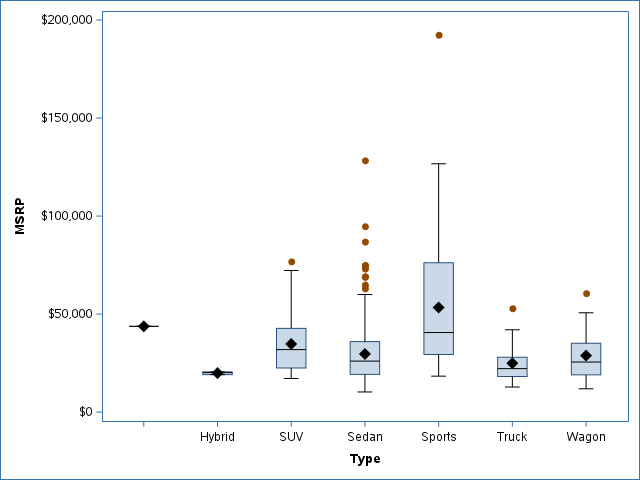

In [12]:
# v or h box plot
# category
# missing
sas.submitLST(
f"""
proc sgplot data=cars;
    vbox msrp / missing category=type;
run;
""")


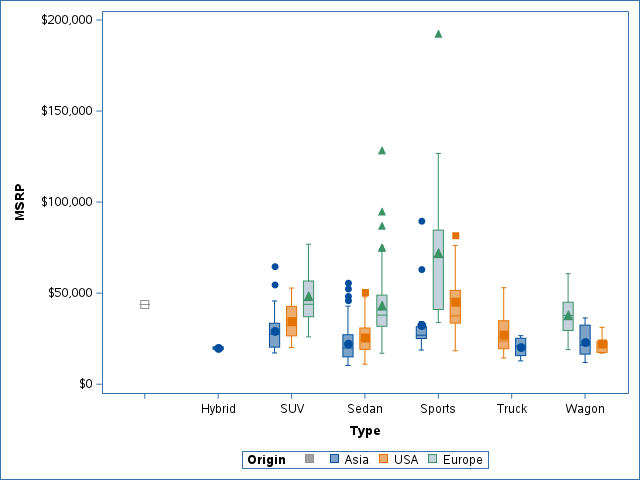

In [13]:
# group
sas.submitLST(
f"""
proc sgplot data=cars;
    vbox msrp / missing category=type group=origin;
run;
""")


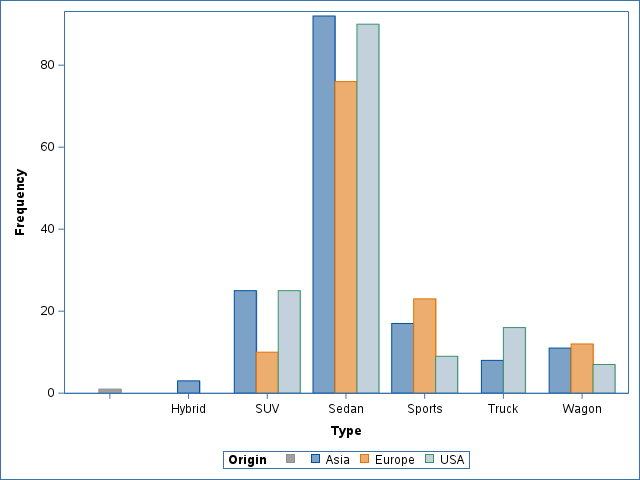

In [15]:
sas.submitLST(
f"""
proc sgplot data=cars;
    vbar type / missing group=origin groupdisplay=cluster;
run;
""")